# モデルのテストと検証用

## モデルの読み込み

In [1]:
import torch
import tkinter as tk
from tkinter import filedialog
import torchvision.transforms as transforms

In [2]:
# GPUチェック
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(filetypes=[("モデルファイル", "*.pth;*.pt")])

# モデルを読み込む
model = torch.load(file_path, map_location=torch.device(device))

## 共通関数の読み込み

In [4]:
import sys
sys.path.append('..')

# 共通関数のロード
import importlib
import PyTorch_lib.lib1
importlib.invalidate_caches()
importlib.reload(PyTorch_lib.lib1)
from PyTorch_lib.lib1 import *

# 共通関数の存在チェック
print(README)

Common Library for PyTorch
Author: H. Hiroshi
Ver:1.0.1


## 画像ファイルを選択

In [5]:
import os
from PIL import Image

# 画像ファイルを読み込む
file_path = filedialog.askopenfilename(filetypes=[("画像ファイル", "*.jpg;*.jpeg;*.jfif;*.webp")])

# ファイルの拡張子を変換する
if os.path.splitext(file_path)[1] == '.jfif':
    im = Image.open(file_path)
    im.convert("RGB").save(os.path.splitext(file_path)[0] + ".jpg")
    file_path = os.path.splitext(file_path)[0] + ".jpg"
elif os.path.splitext(file_path)[1] == '.webp':
    im = Image.open(file_path)
    im.save(os.path.splitext(file_path)[0] + ".jpg")
    file_path = os.path.splitext(file_path)[0] + ".jpg"

## 画像判定

DippingNoodles: 100.00%
Miso: 0.00%
Salt: 0.00%


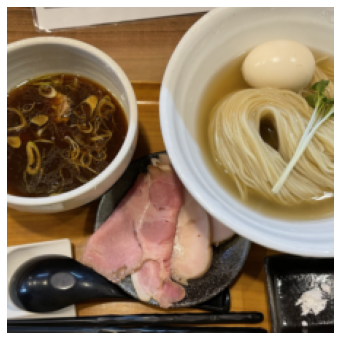

In [6]:
TRAIN_DATA_PATH = r"C:\\Users\\peper\\OneDrive\\TrainingData\\RamenAi"
# 学習データ内のフォルダ検索
all_file_dir = os.listdir(TRAIN_DATA_PATH)

# 分類先クラスのリスト作成
classes = [f for f in all_file_dir if os.path.isdir(os.path.join(TRAIN_DATA_PATH, f))]

# 入力画像の読み込み
input_image = Image.open(file_path)
ImageRec(model, input_image, classes, device)

## Grad-CAM

c:\Users\peper\anaconda3\lib\site-packages\torch\nn\modules\module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
c:\Users\peper\anaconda3\lib\site-packages\torch\nn\functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


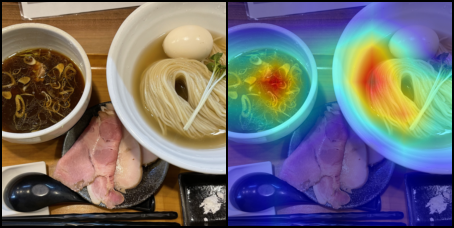

In [7]:
from torchvision.utils import make_grid

# Grad-CAM
from gradcam.utils import visualize_cam
from gradcam import GradCAMpp

# 前処理の定義
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

# 前処理を行う
input_tensor = preprocess(input_image)
input_tensor = input_tensor.unsqueeze(0)
model = model.to(device)
input_tensor = input_tensor.to(device)
input_tensor_normalize = transforms.Normalize(0.5, 0.5)(input_tensor)

# Grad-CAMにモデルと最終レイヤーを指定
target_layer = model.features
gradcam_pp = GradCAMpp(model, target_layer)

# 
images = []
mask_pp, _ = gradcam_pp(input_tensor_normalize)
_, result_pp = visualize_cam(mask_pp, input_tensor)

images.extend([input_tensor[0].cpu(), result_pp])
grid_image = make_grid(images, nrow=2)

# 結果の表示
transforms.ToPILImage()(grid_image)